In [1]:
import numpy as np
import pandas as pd
import os

In [2]:
cwd = os.getcwd()  
# Print the current working   
# directory (CWD)  
# which is root in this case 
print("Current working directory:", cwd) 

Current working directory: C:\Users\Majid


In [3]:

Data=pd.read_csv("tasks.csv")
def Build_input_sample_set(Data):
    sample_input=[]
    first_key=Data['assigned_time']
    second_key=Data['completion_time']   
    third_key=0
    for i in range(len( first_key)):
        sample_input.append(dict(start_time=first_key[i],end_time=second_key[i],level=third_key))
    return sample_input

sample_input=Build_input_sample_set(Data)
print(sample_input)

[{'start_time': '2020-08-06 11:22:09', 'end_time': '2020-08-06 11:59:29', 'level': 0}, {'start_time': '2020-08-06 12:44:05', 'end_time': '2020-08-06 16:01:04', 'level': 0}, {'start_time': '2020-08-06 13:42:08', 'end_time': '2020-08-10 12:30:39', 'level': 0}, {'start_time': '2020-08-12 09:48:15', 'end_time': '2020-08-12 10:11:27', 'level': 0}, {'start_time': '2020-08-06 12:36:37', 'end_time': '2020-08-07 09:23:20', 'level': 0}, {'start_time': '2020-08-12 10:11:29', 'end_time': '2020-08-12 10:29:01', 'level': 0}, {'start_time': '2020-08-07 10:09:35', 'end_time': '2020-08-10 08:55:49', 'level': 0}, {'start_time': '2020-08-11 15:04:36', 'end_time': '2020-08-11 15:26:46', 'level': 0}, {'start_time': '2020-08-12 10:53:56', 'end_time': '2020-08-12 11:42:35', 'level': 0}, {'start_time': '2020-08-06 12:46:16', 'end_time': '2020-08-06 14:16:55', 'level': 0}, {'start_time': '2020-08-06 12:19:34', 'end_time': '2020-08-06 12:37:22', 'level': 0}, {'start_time': '2020-08-06 11:20:10', 'end_time': '20

In [4]:

def sorted_list(lista,key,decreasing):
    '''this function sorts a list based on second component. If decreasing=True, then the list will be
    decreasing based on second element
    decreasing: True or False'''
    def takeSecond(elem):
        return elem[key]

    lista= sorted(lista, key=takeSecond, reverse=decreasing)
    return lista

def Group_sorting(sample):
    Firstkey_list=[]
    length_sample=len(sample)
    for i in range(length_sample):
        Firstkey_list.append(sample[i]['start_time'])
        unique_Firstkey_list=list(set(Firstkey_list))
        #unique_Firstkey_list=sorted_list(unique_Firstkey_list,decreasing=False)    
    group_list=[]
   
    for item in unique_Firstkey_list:
        lista=[]
        for i in range(length_sample):
            if sample[i]['start_time']==item:
                lista.append(sample[i])        
        group_list.append(lista)  
    
    sorted_sample_list=[]
    
  
    length_group_list=len(group_list)
    for i in range(length_group_list):        
        
        sorted_lista=sorted_list(group_list[i],key='end_time',decreasing=True)
        sorted_sample_list.extend(sorted_lista)
         
    return sorted_sample_list
            
        
        


In [34]:
def Assign_levelnumber(current_level_list,level_num):
    upper_level=level_num+1
    length_list=len(current_level_list)    
    for i in range(length_list-1):
        curernt_date=current_level_list[i] 
       
        if curernt_date['level']==level_num:
            for j in range(i+1,length_list):
                Next_date=current_level_list[j]
                if Next_date['level']==level_num and Next_date['start_time']<curernt_date['end_time']:
                            Next_date['level']=upper_level     
                            
    return current_level_list,  upper_level

def Seperated_interval_in_current_level(current_level_list,upper_level_number):
    Keep_item_in_list=[]
    Selected_item_in_list=current_level_list.copy()
    length_list=len(current_level_list)
    for i in range(length_list):        
        if current_level_list[i]['level']==upper_level_number:  
            Keep_item_in_list.append(current_level_list[i])
            Selected_item_in_list.remove(current_level_list[i])
            
    return Selected_item_in_list, Keep_item_in_list

            

In [35]:
sample_list=sorted_list(sample_input,key='start_time',decreasing=False)
#sample_list=Group_sorting(sample_list)
level_num=0
Sample_output=[]
while True:
    current_level_list, upper_level_num=Assign_levelnumber(sample_list,level_num)
    selected_current_interval, sample_list= Seperated_interval_in_current_level(current_level_list, upper_level_num)
    Sample_output.extend(selected_current_interval)  
    level_num=upper_level_num
    print(level_num)
    if len(sample_list)==0:
        break
        
Sample_output=sorted_list(Sample_output,key='start_time',decreasing=False)      
print( Sample_output)
        

1
2
3
4
5
6
7
8
9
10
11
[{'start_time': '2020-08-06 09:21:07', 'end_time': '2020-08-06 10:07:52', 'level': 0}, {'start_time': '2020-08-06 11:20:10', 'end_time': '2020-08-06 12:36:35', 'level': 0}, {'start_time': '2020-08-06 11:20:32', 'end_time': '2020-08-06 14:14:23', 'level': 1}, {'start_time': '2020-08-06 11:22:09', 'end_time': '2020-08-06 11:59:29', 'level': 2}, {'start_time': '2020-08-06 11:25:31', 'end_time': '2020-08-06 12:24:43', 'level': 3}, {'start_time': '2020-08-06 11:57:43', 'end_time': '2020-08-06 14:04:05', 'level': 4}, {'start_time': '2020-08-06 12:00:29', 'end_time': '2020-08-06 12:19:25', 'level': 2}, {'start_time': '2020-08-06 12:03:25', 'end_time': '2020-08-06 12:44:03', 'level': 5}, {'start_time': '2020-08-06 12:19:34', 'end_time': '2020-08-06 12:37:22', 'level': 2}, {'start_time': '2020-08-06 12:24:45', 'end_time': '2020-08-06 12:51:45', 'level': 3}, {'start_time': '2020-08-06 12:36:37', 'end_time': '2020-08-07 09:23:20', 'level': 0}, {'start_time': '2020-08-06 12

In [38]:
import seaborn as sns
people=Data['analyst_id'] 
unique_people=list(set(people))
 y_minority = Data.loc[Data['Target'] == 1]
    minority_patient = y_minority['Patient']
Data[Data==] 


[159, 99, 69, 39, 139, 299, 109, 49, 19, 149, 309, 119, 59, 29, 319]

In [39]:
Duration=Data['file_duration']
stage=Data['stage_id']
new_col=Duration/stage

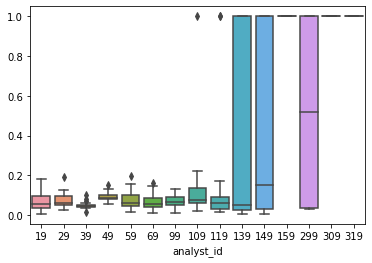

In [45]:
people=Data['analyst_id'] 
max_n=max(new_col)
new_col_norm=new_col/max_n


ax = sns.boxplot(x=people, y=new_col_norm, data=Data)

In [36]:
import seaborn as sns
def Build_input_sample_set(Data):
    sample_box=[]
    Duration=Data['file_duration']
    stage=Data['stage_id']
    people=Data['analyst_id']   
    third_key=0
    for i in range(len( first_key)):
        sample_input.append(dict(start_time=first_key[i],end_time=second_key[i],level=third_key))
    return sample_input